In [1404]:
import os 
import sys 
import math
import numpy as np 
import random 
import argparse
import cv2
import matplotlib.pyplot as plt
import pickle
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.cluster import KMeans

from skimage.feature import hog
from skimage import exposure


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

np.random.seed(42)

In [1405]:
data_dir = './data/'
class_list = ['Batman', 'Spiderman', 'None']


Width = 256
Height = 512

In [1406]:
def get_file_names(path):
    return [os.path.join(path,f) for f in os.listdir(path)]

In [1520]:
! ls

LICENSE                                data_svm.dat
Output.txt                             detector.py
README.md                              image_preprocessing.ipynb
__pycache__                            main.py
best_param.pkl                         model.sav
best_param_limmited.pkl                predict.py
classifier_prototype.ipynb             preprocess.py
classifier_prototype_old_version.ipynb train.py
data


In [1521]:
image_paths = {}
for training_name in class_list:
    dir_= os.path.join(data_dir, training_name)
    class_path = get_file_names(dir_)
    image_paths[training_name] = class_path

In [1522]:
label_dict = {'Batman':0, 'Spiderman':1, 'None':2}
index_to_class = {}
index_to_class = {v:k for k,v in label_dict.items()}
image_data = []
for k, v in image_paths.items():
    for im in v: 
        image_data.append((im, label_dict[k]))

In [1523]:
np.random.shuffle(image_data)
image_paths, labels = zip(*image_data)

In [1524]:
des_list=[]
# hog = cv2.HOGDescriptor()

# https://stackoverflow.com/questions/44972099/opencv-hog-features-explanation
# https://answers.opencv.org/question/86023/what-is-the-hog-descriptors-shape/
#

HEIGHT = 256
WIDTH = 128

des_list=[]
for path in image_paths:
    img = cv2.imread(path)
    img = cv2.GaussianBlur(img, (3, 3), 7)
    resized_image = []
    for i in range(3): 
        resized_image.append(cv2.resize(img[:,:,i], (WIDTH, HEIGHT)))
#     resized_image = np.array(resized_image).reshape(128,64,3)
    resized_image = np.transpose(np.array(resized_image), (1, 2, 0))
    #creating hog features 
    descriptor, hog_image = hog(resized_image, orientations=9, pixels_per_cell=(4, 4), 
                    cells_per_block=(2, 2), visualize=True,channel_axis = -1,feature_vector= False)
#     descriptor = hog.compute(resized_image)
    des_list.append((path,np.array(descriptor)))

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [1525]:
img = cv2.imread(path)
resized_image = []
for i in range(3): 
    resized_image.append(cv2.resize(img[:,:,i], (WIDTH,HEIGHT)))
resized_image = np.transpose(np.array(resized_image), (1, 2, 0))# .reshape(512,256,3)

In [1526]:
resized_image.shape

(256, 128, 3)

In [1527]:
# descriptor = hog.compute(resized_image)

In [1528]:
descriptor.shape

(63, 31, 2, 2, 9)

In [1529]:
# fd, hog_image = hog(resized_image, orientations=9, pixels_per_cell=(8, 8), 
#                     cells_per_block=(2, 2), visualize=True,channel_axis = -1,feature_vector= False)

In [1530]:
descriptor.shape

(63, 31, 2, 2, 9)

In [1531]:
# n_blocks_row, n_blocks_col, n_cells_row, n_cells_col, n_orient

256/8,512/8,2,2,9

(32.0, 64.0, 2, 2, 9)

In [1532]:
fd.reshape(31, 63, 4, -1).shape #.shape

(31, 63, 4, 9)

In [1533]:
np.mean(np.mean(fd.reshape(31, 63, 4, -1),axis =-1),axis =-1).shape

(31, 63)

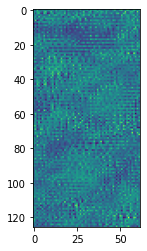

In [1534]:

#Show the image with matplotlib
plt.imshow(fd.reshape(126, 62, -1).mean(axis=-1))
plt.show()

In [1535]:
70308/9/4/63/31

1.0

In [1536]:
hog_image.shape

(256, 128)

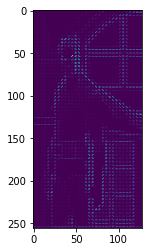

In [1537]:
hog_image


#Show the image with matplotlib
plt.imshow(hog_image)
plt.show()


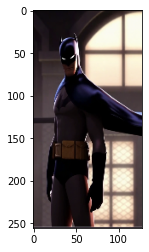

In [1539]:

#Show the image with matplotlib
plt.imshow(resized_image[:,:,::-1])
plt.show()


# cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [1540]:
path.split('/')[2]

'Batman'

In [1541]:
# for i in range(3): 
#     resized_image.append(cv2.resize(img[:,:,i], (WIDTH, HEIGHT)))
# #     resized_image = np.array(resized_image).reshape(128,64,3)
# resized_image = np.transpose(np.array(resized_image), (1, 2, 0))
# #creating hog features 
# descriptor, hog_image = hog(resized_image, orientations=9, pixels_per_cell=(4, 4), 
#                 cells_per_block=(2, 2), visualize=True,channel_axis = -1,feature_vector= False)
# #     descriptor = hog.compute(resized_image)
# des_list.append((path,np.array(descriptor)))
# reshaped_features = []
# image_labels = []
# BoW = []
# BoW_labels = [] 
# for i in range(len(des_list)): 
#     temp_des = des_list[i][1]
#     reshaped_features.append(temp_des.reshape(int((HEIGHT/4-1)*(WIDTH/4-1)),-1))
#     image_labels.append(label_dict[des_list[i][0].split('/')[2]])
#     for j in range(reshaped_features[i].shape[0]):
#         BoW.append(reshaped_features[i][j])
#         BoW_labels.append(des_list[i][0].split('/')[2])
        
        
# def build_histogram(descriptor_list, cluster_alg):
#     histogram = np.zeros(len(cluster_alg.cluster_centers_))
#     cluster_result =  cluster_alg.predict(descriptor_list)
#     for i in cluster_result:
#         histogram[i] += 1.0
#     return histogram

# kmeans = KMeans(n_clusters = 128)
# kmeans.fit(BoW_array)

# preprocessed_image = []

# for descriptor in reshaped_features:
#     if (descriptor is not None):
#         temp_features = []
#         for piece in descriptor: 
#             histogram = build_histogram(piece.reshape(1,-1), kmeans)  # getting histogram for each piece 
#             temp_features.append(histogram)
#         temp_features = np.sum(np.array(temp_features), 0)
#         preprocessed_image.append(temp_features.reshape(-1,))

In [1542]:
reshaped_features = []
image_labels = []
BoW = []
BoW_labels = [] 
for i in range(len(des_list)): 
    temp_des = des_list[i][1]
    reshaped_features.append(temp_des.reshape(int((HEIGHT/4-1)*(WIDTH/4-1)),-1))
    image_labels.append(label_dict[des_list[i][0].split('/')[2]])
    for j in range(reshaped_features[i].shape[0]):
        BoW.append(reshaped_features[i][j])
        BoW_labels.append(des_list[i][0].split('/')[2])

In [1543]:
BoW_array = np.array(BoW)

In [1544]:
BoW_array.shape

(419895, 36)

In [ ]:
15 x 7 x 2 x 2 x 9 

In [1545]:
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

kmeans = KMeans(n_clusters = 256)  # %56 with K=128
kmeans.fit(BoW_array)

preprocessed_image = []

for descriptor in reshaped_features:
    if (descriptor is not None):
        temp_features = []
        for piece in descriptor: 
            histogram = build_histogram(piece.reshape(1,-1), kmeans)  # getting histogram for each piece 
            temp_features.append(histogram)
        temp_features = np.sum(np.array(temp_features), 0)
        preprocessed_image.append(temp_features.reshape(-1,))

In [1546]:
len(preprocessed_image)

215

In [1547]:
preprocessed_image[0].shape

(256,)

In [1548]:
x_train, x_test, y_train, y_test = train_test_split(preprocessed_image, image_labels,
                                                    test_size = .2, random_state = 14)


In [1549]:
grid = { 
    'C': [2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1, 2, 4 ,8 ,16],
    'kernel': ['linear', 'poly', 'rbf'],
}

# grid = { 
#     'C': [2**(-5),  2**(-3), 1, 4 ,16],
#     'kernel': ['linear', 'rbf'],
# }

In [1550]:
svm_cv = GridSearchCV(estimator=SVC(), param_grid=grid, cv= 5)
svm_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16],
                         'kernel': ['linear', 'poly', 'rbf']})

In [1551]:
print(svm_cv.best_params_)
best_param = svm_cv.best_params_

{'C': 0.25, 'kernel': 'poly'}


In [1552]:
pickle_file_name = 'best_param.pkl'
with open(pickle_file_name, 'wb') as handle:
    pickle.dump(svm_cv.best_params_, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [1553]:
pickle_file_name = 'best_param.pkl'
if os.path.exists(pickle_file_name):
    with open(pickle_file_name, 'rb') as handle:
        best_param = pickle.load(handle)

In [1554]:
svm_clf = SVC(**best_param)
svm_clf.fit(x_train, y_train)

SVC(C=0.25, kernel='poly')

In [1555]:
y_pred = svm_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6976744186046512

In [1556]:
accuracy_score(y_test, y_pred)

0.6976744186046512

In [1443]:
sift = cv2.SIFT_create()

test_path = 'data/test_comic_locations/spiderman1.jpeg'
# test_path = 'data/test_comic_locations/spiderman3.jpeg'
training_path = 'data/Spiderman/0.png'
training_path = './data/training.png'


# load the image, convert it to grayscale, and blur it
test_image = cv2.imread(test_path)
train_image = cv2.imread(training_path)

# resized_image= []
# for i in range(3): 
#     resized_image.append(cv2.resize(test_image[:,:,i], (512,1024)))
# #     resized_image = np.array(resized_image).reshape(128,64,3)
# test_image = np.transpose(np.array(resized_image),  (1, 2, 0))  # (1, 2, 0)

# resized_image= []
# for i in range(3): 
#     resized_image.append(cv2.resize(train_image[:,:,i], (256,512)))
# #     resized_image = np.array(resized_image).reshape(128,64,3)
# train_image = np.transpose(np.array(resized_image),  (1, 2, 0))  # (1, 2, 0)

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray = cv2.GaussianBlur(gray, (3, 3), 0)

train_image.shape

(833, 1891, 3)

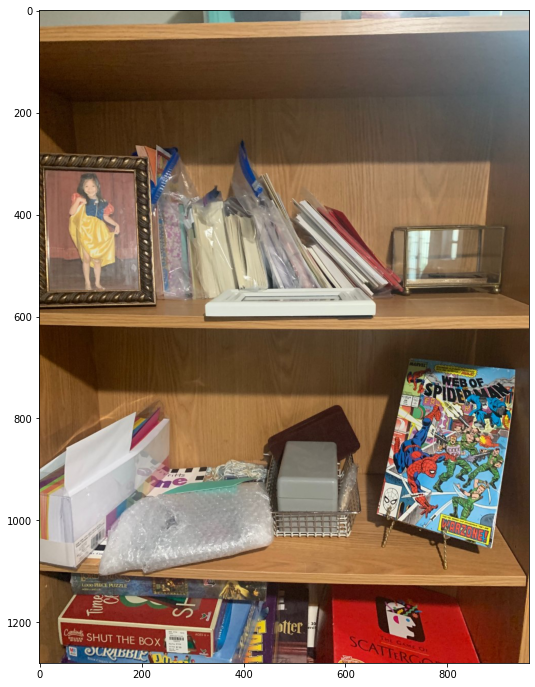

In [1363]:
plt.figure(figsize=(20,12))
plt.imshow(test_image[:,:,::-1])
plt.show()

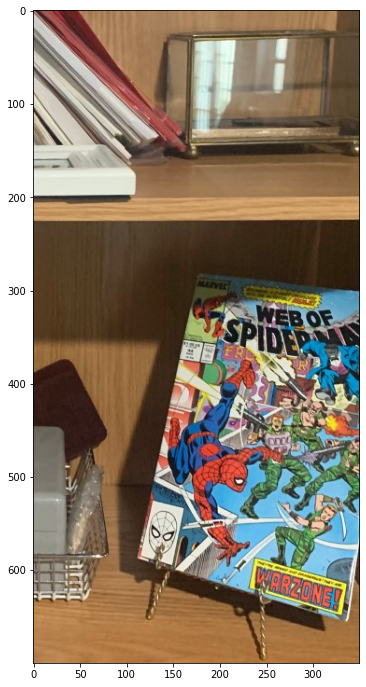

In [1445]:
##############################
###############
###############
def matching_points(train_image, query_image):
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(train_image, None)
    keypoints2, descriptors2 = sift.detectAndCompute(query_image, None)
    FLAN_INDEX_KDTREE = 0
    index_params = dict (algorithm = 0, trees=5) # algorithm = FLAN_INDEX_KDTREE
    search_params = dict (checks=100)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch (descriptors1, descriptors2, k=2)
    good_matches = []



    distance_list = []
    for m, n in matches:
        distance_list.append(m.distance)
        if m.distance < 0.65* n.distance:
            good_matches.append([m])
    
    average_distance = np.mean(distance_list)
            

    # Sort them in the order of their distance.
    good_matches = sorted(good_matches, key = lambda x:x[0].distance)

    good_matches = good_matches[:50]


    query_pts = np.float32([keypoints1[m[0].queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    train_pts = np.float32([keypoints2[m[0].trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
    # matches_mask = mask.ravel().tolist()


    # # Perspective transform
    # h, w = train_image.shape[:2]
    # h, w = 200, 100
    # pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
    # dst = cv2.perspectiveTransform(pts, matrix)
    return query_pts, train_pts, average_distance



query_pts, train_pts, average_dist = matching_points(train_image, test_image)

# f1_mean = np.mean(train_pts[:,0,0].reshape(-1,1), axis = 0)
# f2_mean = np.mean(train_pts[:,0,1].reshape(-1,1), axis = 0)

# def cal_dist(point, samples_mean):
#     return np.sqrt(abs(point - samples_mean))
    
# x = cal_dist(train_pts[:,0,0].reshape(-1,1), f1_mean)
# y = cal_dist(train_pts[:,0,1].reshape(-1,1), f2_mean)

# distance = np.array([np.sqrt(i**2+j**2) for i,j in zip(x,y)])
# sorted_points = [p for d,p in sorted(zip(distance, train_pts.tolist()))]
# np.mean(np.array(sorted_points[:10]).squeeze(1), axis=0)   # Solution 



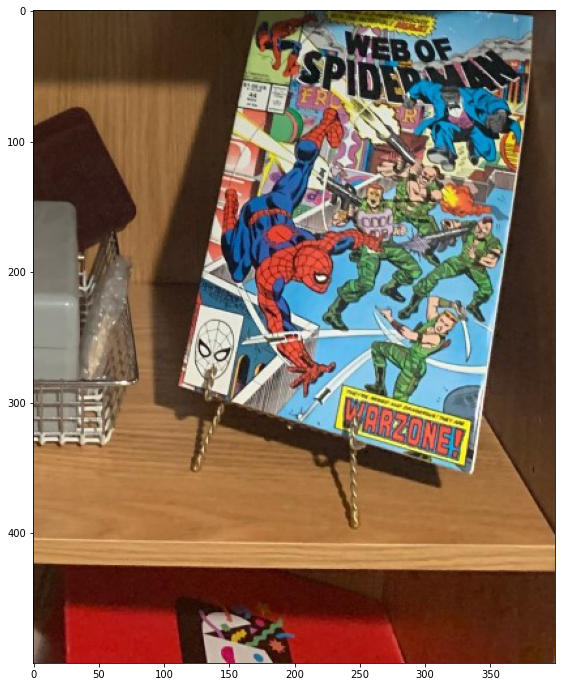

In [1447]:
range_dictionary = {}
maximum_height = 1280
maximum_width = 960

h = 0 
w = 0
slide_w = 50
counter = 0 
window_dim = 400 
reduce_width = 50
add_height = 100

h_end = window_dim + add_height
w_end = window_dim - reduce_width

while h_end< maximum_height: 

    new_h = h  + window_dim + add_height
    w = 0 
    w_end = window_dim
    while w_end<maximum_width: 
        new_w = w + window_dim - reduce_width
        range_dictionary[counter] = ((h, new_h),(w, new_w))
        counter += 1
        w += slide_w
        w_end += slide_w 
    
    h += slide_w 
    h_end += slide_w  

    
    
min_dist = np.inf 
for p_key in range_dictionary.keys():
    i1,i2 = range_dictionary[p_key][0]
    j1,j2 = range_dictionary[p_key][1]
    query_pts, train_pts, average_dist = matching_points(train_image, test_image[i1:i2, j1:j2])
    if average_dist < min_dist: 
        min_dist = average_dist
        best_pts = train_pts 
        best_key = p_key 
        
        

i1,i2 = range_dictionary[best_key][0]
j1,j2 = range_dictionary[best_key][1]
test_image[i1:i2, j1:j2]
goal_image = test_image[i1:i2, j1:j2]

plt.figure(figsize=(20,12))
plt.imshow(test_image[i1:i2, j1:j2, ::-1])
plt.show()

In [1364]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(train_image, None)
keypoints2, descriptors2 = sift.detectAndCompute(test_image, None)
FLAN_INDEX_KDTREE = 0
index_params = dict (algorithm = 0, trees=5) # algorithm = FLAN_INDEX_KDTREE
search_params = dict (checks=100)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch (descriptors1, descriptors2, k=2)
good_matches = []




for m, n in matches:
    if m.distance < 0.65* n.distance:
        good_matches.append([m])
        
# Sort them in the order of their distance.
good_matches = sorted(good_matches, key = lambda x:x[0].distance)

good_matches = good_matches[:50]

# good_matches = []

# for m, n in matches:
#     if m.distance < 0.7* n.distance:
#         good_matches.append(m)


query_pts = np.float32([keypoints1[m[0].queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
train_pts = np.float32([keypoints2[m[0].trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
matches_mask = mask.ravel().tolist()


# Perspective transform
h, w = train_image.shape[:2]
h, w = 200, 100
pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts, matrix)

query_pts = np.float32([keypoints1[m[0].queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
train_pts = np.float32([keypoints2[m[0].trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
matches_mask = mask.ravel().tolist()


# Perspective transform
h, w = train_image.shape[:2]
h, w = 200, 100
pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts, matrix)

In [1365]:
keypoints1, descriptors1 = sift.detectAndCompute(train_image, None)
keypoints2, descriptors2 = sift.detectAndCompute(test_image, None)  # train_image

In [1366]:
FLAN_INDEX_KDTREE = 0
index_params = dict (algorithm = 0, trees=5) # algorithm = FLAN_INDEX_KDTREE
search_params = dict (checks=100)

In [1367]:
# grayframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # trainimage
# kp_grayframe, desc_grayframe = sift.detectAndCompute(grayframe, None)
# matches = flann.knnMatch(desc_image, desc_grayframe, k=2)

In [1368]:
flann = cv2.FlannBasedMatcher(index_params, search_params)


In [1369]:
matches = flann.knnMatch (descriptors1, descriptors2, k=2)


In [1370]:
good_matches = []




for m, n in matches:
    if m.distance < 0.65* n.distance:
        good_matches.append([m])
        
# Sort them in the order of their distance.
good_matches = sorted(good_matches, key = lambda x:x[0].distance)

good_matches = good_matches[:50]

In [1212]:
pts = cv2.KeyPoint_convert(keypoints2)
pts.shape

(5161, 2)

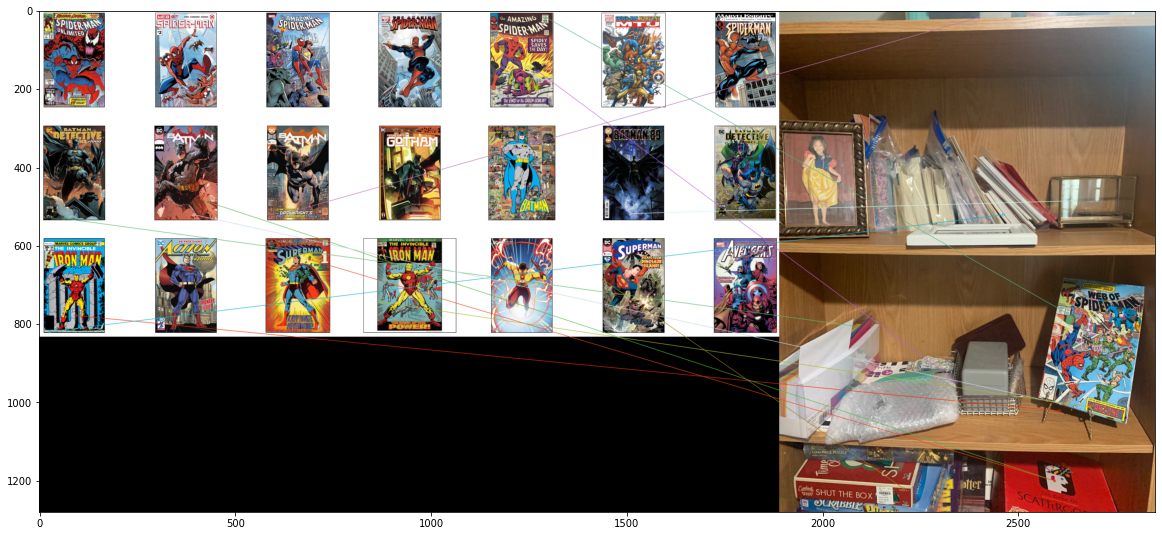

In [1213]:
flann_matches =cv2.drawMatchesKnn(train_image, keypoints1, test_image, keypoints2, good_matches, None, flags=2)
#Show the image with matplotlib
plt.figure(figsize=(20,12))
plt.imshow(flann_matches[:,:,::-1])
plt.show()

In [1214]:
print(train_image.shape)
print(test_image.shape)

(833, 1891, 3)
(1280, 960, 3)


In [1215]:
# good_matches = []

# for m, n in matches:
#     if m.distance < 0.7* n.distance:
#         good_matches.append(m)


query_pts = np.float32([keypoints1[m[0].queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
train_pts = np.float32([keypoints2[m[0].trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
matches_mask = mask.ravel().tolist()


# Perspective transform
h, w = train_image.shape[:2]
h, w = 200, 100
pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts, matrix)

In [1216]:
np.max(train_pts,axis = -0)

array([[ 791.5499, 1220.4406]], dtype=float32)

In [1217]:
np.mean(query_pts, axis = 0)

array([[723.3328, 535.7144]], dtype=float32)

In [1218]:
print(test_image.shape)
print(train_image.shape)

(1280, 960, 3)
(833, 1891, 3)


In [1219]:
h,w = test_image.shape[:2]

print(h, ' x ', w)

1280  x  960


In [1220]:
query_pts[0]

array([[ 93.46804, 778.5782 ]], dtype=float32)

In [1221]:
for m in good_matches[0]:
    print(m.distance)

78.73372650146484


##  New Solution

In [1481]:
def matching_points(train_image, query_image):
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(train_image, None)
    keypoints2, descriptors2 = sift.detectAndCompute(query_image, None)
    FLAN_INDEX_KDTREE = 0
    index_params = dict (algorithm = 0, trees=5) # algorithm = FLAN_INDEX_KDTREE
    search_params = dict (checks=100)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch (descriptors1, descriptors2, k=2)
    good_matches = []



    distance_list = []
    for m, n in matches:
        distance_list.append(m.distance)
        if m.distance < 0.65* n.distance:
            good_matches.append([m])
    
    average_distance = np.mean(distance_list)
            

    # Sort them in the order of their distance.
    good_matches = sorted(good_matches, key = lambda x:x[0].distance)

    good_matches = good_matches[:50]


    query_pts = np.float32([keypoints1[m[0].queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    train_pts = np.float32([keypoints2[m[0].trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
    # matches_mask = mask.ravel().tolist()


    # # Perspective transform
    # h, w = train_image.shape[:2]
    # h, w = 200, 100
    # pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
    # dst = cv2.perspectiveTransform(pts, matrix)
    return query_pts, train_pts, average_distance

In [1482]:
query_pts, train_pts, average_dist = matching_points(train_image, test_image)

# f1_mean = np.mean(train_pts[:,0,0].reshape(-1,1), axis = 0)
# f2_mean = np.mean(train_pts[:,0,1].reshape(-1,1), axis = 0)

# def cal_dist(point, samples_mean):
#     return np.sqrt(abs(point - samples_mean))
    
# x = cal_dist(train_pts[:,0,0].reshape(-1,1), f1_mean)
# y = cal_dist(train_pts[:,0,1].reshape(-1,1), f2_mean)

# distance = np.array([np.sqrt(i**2+j**2) for i,j in zip(x,y)])
# sorted_points = [p for d,p in sorted(zip(distance, train_pts.tolist()))]
# np.mean(np.array(sorted_points[:10]).squeeze(1), axis=0)   # Solution 

range_dictionary = {}
maximum_height = 1280
maximum_width = 960

h = 0 
w = 0
slide_w = 50
counter = 0 
window_dim = 400 
reduce_width = 50
add_height = 100

h_end = window_dim + add_height
w_end = window_dim - reduce_width

while h_end< maximum_height: 

    new_h = h  + window_dim + add_height
    w = 0 
    w_end = window_dim
    while w_end<maximum_width: 
        new_w = w + window_dim - reduce_width
        range_dictionary[counter] = ((h, new_h),(w, new_w))
        counter += 1
        w += slide_w
        w_end += slide_w 
    
    h += slide_w 
    h_end += slide_w  


In [1483]:
min_dist = np.inf 
for p_key in range_dictionary.keys():
    i1,i2 = range_dictionary[p_key][0]
    j1,j2 = range_dictionary[p_key][1]
    query_pts, train_pts, average_dist = matching_points(train_image, test_image[i1:i2, j1:j2])
    if average_dist < min_dist: 
        min_dist = average_dist
        best_pts = train_pts 
        best_key = p_key 
        
        


In [1484]:
print(i1,i2,j1,j2)

750 1250 550 900


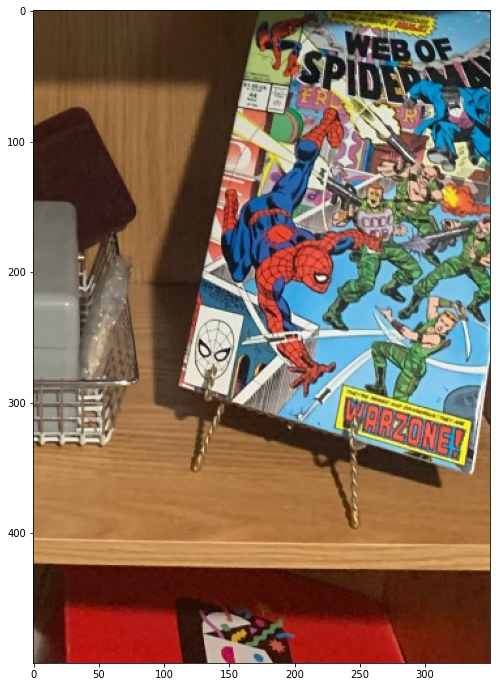

In [1485]:

i1,i2 = range_dictionary[best_key][0]
j1,j2 = range_dictionary[best_key][1]
test_image[i1:i2, j1:j2]
goal_image = test_image[i1:i2, j1:j2]

plt.figure(figsize=(20,12))
plt.imshow(test_image[i1:i2, j1:j2, ::-1])
plt.show()

In [1486]:
resized_image = []
des_list = []
for i in range(3): 
    resized_image.append(cv2.resize(goal_image[:,:,i], (WIDTH, HEIGHT)))
#     resized_image = np.array(resized_image).reshape(128,64,3)
resized_image = np.transpose(np.array(resized_image), (1, 2, 0))

resized_image = cv2.GaussianBlur(resized_image, (3, 3), 7)

#creating hog features 
descriptor, hog_image = hog(resized_image, orientations=9, pixels_per_cell=(4, 4), 
                cells_per_block=(2, 2), visualize=True,channel_axis = -1,feature_vector= False)
#     descriptor = hog.compute(resized_image)
des_list.append((path,np.array(descriptor)))
reshaped_features = []
image_labels = []

for i in range(len(des_list)): 
    temp_des = des_list[i][1]
    reshaped_features.append(temp_des.reshape(int((HEIGHT/4-1)*(WIDTH/4-1)),-1))
    image_labels.append(label_dict[des_list[i][0].split('/')[2]])
        
        
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

preprocessed_image = []
for descriptor in reshaped_features:
    if (descriptor is not None):
        temp_features = []
        for piece in descriptor: 
            histogram = build_histogram(piece.reshape(1,-1), kmeans)  # getting histogram for each piece 
            temp_features.append(histogram)
        temp_features = np.sum(np.array(temp_features), 0)
        preprocessed_image.append(temp_features.reshape(-1,))

In [1487]:
preprocessed_image[0]

array([ 8.,  9.,  1.,  5.,  5.,  5.,  3.,  6.,  3.,  3., 10., 32.,  5.,
        7., 11.,  2., 10.,  3.,  5.,  3.,  3.,  4., 12.,  7.,  6.,  3.,
       16., 10., 12.,  9.,  3., 10.,  3.,  0.,  5.,  5.,  4.,  1.,  3.,
        6.,  8.,  6., 12.,  3.,  5.,  9.,  4.,  9., 19., 11.,  1., 20.,
        4.,  7.,  9.,  6.,  2.,  3., 10.,  3.,  8.,  3., 11.,  4.,  8.,
       43.,  0.,  5.,  2.,  7., 17.,  7.,  0.,  3.,  7., 17.,  3.,  4.,
       10., 12.,  3.,  7., 56.,  8., 16.,  0.,  8.,  5.,  8., 10.,  5.,
        5., 14.,  1.,  4.,  2.,  7., 11., 30., 10.,  7., 10.,  6.,  1.,
        7.,  1.,  8.,  4., 16.,  5.,  2.,  2.,  6.,  6., 11.,  5., 30.,
        5.,  2.,  4.,  6., 14., 12.,  7.,  9., 11.,  2., 13.,  2.,  1.,
       18.,  9.,  6.,  3., 12.,  4.,  5., 11.,  0.,  6.,  6.,  4.,  0.,
        3., 13., 11.,  2.,  4.,  6.,  2.,  3.,  8., 12., 14.,  2., 21.,
       15.,  4.,  2., 16.,  7.,  7., 11.,  9.,  4.,  4.,  2.,  5., 10.,
        1.,  3.,  4.,  2.,  7., 21.,  2.,  4.,  5.,  6.,  4., 15

In [1488]:
preprocessed_image[0].reshape(-1,).shape

(256,)

In [1489]:
y_pred = svm_clf.predict(preprocessed_image[0].reshape(1, -1) )


In [1490]:
index_to_class[int(y_pred)]

'Batman'